In [1]:
### TODO add ground-truth

In [2]:
%matplotlib inline
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
import feature_effect as fe
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.rcParams["figure.figsize"] = (15,10)

In [3]:
def generate_samples(N, seed):
    if seed is not None:
        np.random.seed(seed)

    x1 = np.random.uniform(size=N)
    x2 = np.random.uniform(size=N)
    return np.stack([x1, x2]).T


def f(x):
    t = 10.5
    return np.cos(2*np.pi*t*x[:,0]) + np.sin(2*np.pi*t*x[:,1])


def f_der(x):
    t = 10
    return np.stack([-2*np.pi*t*np.sin(2*np.pi*t*x[:,0]), 2*np.pi*t*np.cos(2*np.pi*t*x[:,1])], axis=-1)

In [4]:
seed = 1
N = 1000
X = generate_samples(N, seed)
y = f(X)
dy = f_der(X)

In [5]:
# ALE
K = 2
ale = fe.ALE(data=X, model=f)

def plot(bins):
    ale.fit(features=[0, 1], k=bins)
    ale.plot(s=0, block=False)
    plt.show()
    
interactive_plot = widgets.interactive(plot, bins=(1, 100, 1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=50, description='bins', min=1), Output()), _dom_classes=('widget-interac…

In [6]:
dale = fe.DALE(data=X, model=f, model_jac=f_der)
def plot(bins):
    dale.fit(features=[0, 1], k=bins)
    dale.plot(s=0, block=False)
    plt.show()

interactive_plot = widgets.interactive(plot, bins=(1, 100, 1))
output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=50, description='bins', min=1), Output()), _dom_classes=('widget-interac…

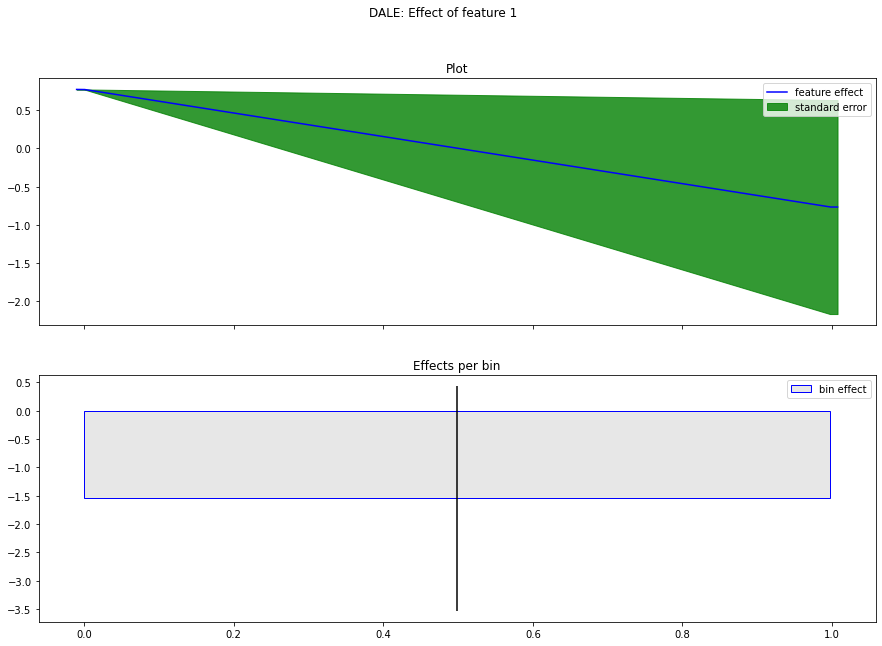

In [11]:
    dale.fit(features=[0, 1], k=10, method="variable-size")
    dale.plot(s=0, block=False)

In [7]:
est = fe.Estimator(data=X, model=f, model_jac=f_der)

def plot(bins):
    est.fit(features=[0,1], method="all", nof_bins=bins)
    est.plot(feature=0, method="all")
    plt.show()

interactive_plot = widgets.interactive(plot, bins=(1, 100, 1))
output = interactive_plot.children[-1]
output.layout.height = '800px'
interactive_plot

interactive(children=(IntSlider(value=50, description='bins', min=1), Output(layout=Layout(height='800px'))), …